In [1]:
library(ggplot2)
library(jsonlite)
library(ape)
suppressPackageStartupMessages(library(ggtree))
suppressPackageStartupMessages(library(Rgraphviz))

dataDir <- "Data"
genomeTreeDir <- "Genome_tree"
snpDir <- "SNPs"
figureDir <- "Figures"

Warning message:
"package 'jsonlite' was built under R version 3.6.2"


In [2]:
dir.create(figureDir, showWarnings = FALSE)

In [3]:
tree <- read.tree(file.path(genomeTreeDir, "RAxML_bestTree.GTRGAMMA"))
info <- read.csv(file.path(dataDir, "info.csv"))
allSNP <- read.csv(file.path(snpDir, "all.csv"))
genotypes <- read_json(file.path(dataDir, "genotypes.json"))

In [4]:
info <- info[complete.cases(info), ]

root2tipDist <- data.frame(
    "Dist" = node.depth.edgelength(tree)[1:length(tree$tip.label)],
    "Accession.ID" = tree$tip.label
)

info <- merge(info, root2tipDist, by = "Accession.ID")

In [5]:
info[["Genotype"]] <- NULL

for (gp in names(genotypes)) {
    for (id in genotypes[[gp]]) {
        info[which(info$Accession.ID == id), "Genotype"] <- gp
    }
}

Saving 10 x 6.67 in image



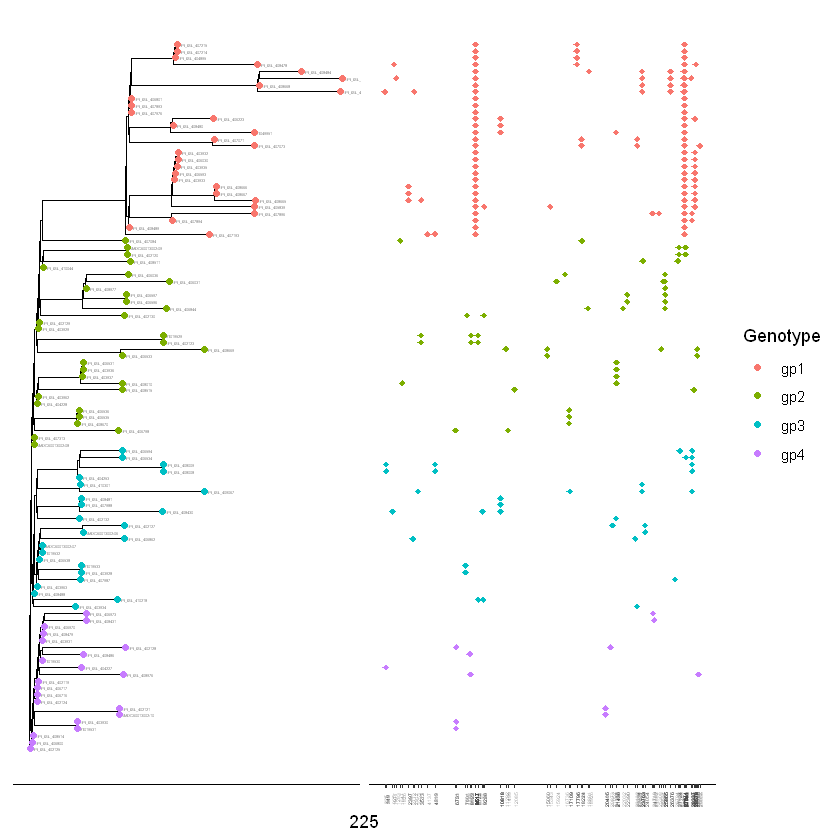

In [44]:
p <- ggtree(tree)
p <- p %<+% info + 
    geom_tiplab(size = 0.75) + 
    geom_tippoint(aes(color=Genotype)) +
    theme(legend.position = "right")
# p
snp_data <- allSNP[, c("Accession.ID", "Pos")]
p <- p + geom_facet(
    panel = "SNP",
    data = snp_data,
    geom = geom_point,
    mapping=aes(x = Pos, color=Genotype),
    shape = 18
) + 
# theme(
# ) +
theme_tree2(
    strip.background = element_blank(),
    strip.text.x = element_blank(),
    axis.text.x = element_text(angle = 90, vjust = 0.5, size = 3)
) +
scale_x_continuous(snp_data$Pos, labels = snp_data$Pos, breaks = snp_data$Pos)
print(p)

ggsave(filename = file.path(figureDir, "figure2.png"), plot = p, width = 10)

In [7]:
snp <- allSNP[, c("Accession.ID", "Pos", "SNP", "Product")]
snp <- merge(snp, info, by = "Accession.ID")
snp["isHubei"] <- factor(c("non-Hubei", "Hubei")[(as.character(snp$Area) == "Hubei") + 1])
levels(snp$Accession.ID) <- as.character(snp$Accession.ID[order(snp$Dist)])

Saving 6.67 x 6.67 in image



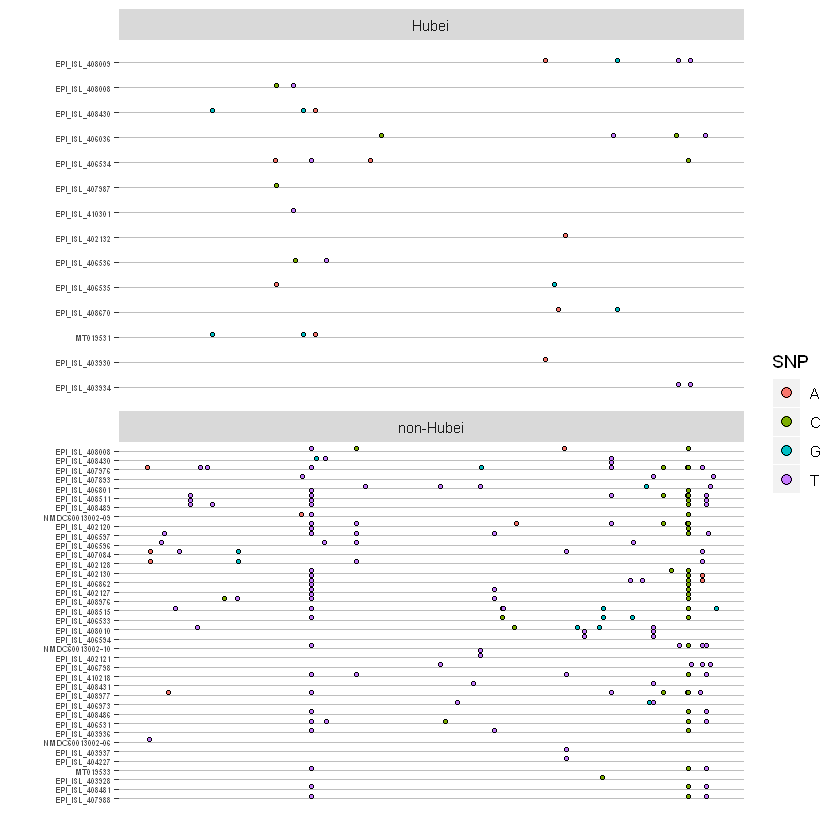

In [13]:
p <- ggplot(snp, aes(x = Accession.ID, y = Pos, fill = SNP)) +
    geom_dotplot(binaxis = "y", binwidth = 1, dotsize = 250) +
#     xlim(seq_len(0, 21399)) +
    coord_flip() +
    ylab("") + xlab("") +
    facet_wrap( ~ isHubei, nrow = 2, scales = "free_y") +
    theme(panel.grid.major = element_line(colour="grey", size = 0.1), 
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          panel.background = element_rect(fill = NA),
          axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          axis.text.y=element_text(size=5, face="bold"))
print(p)

ggsave(filename = file.path(figureDir, "figure3.png"), plot = p)

In [9]:
# suppressPackageStartupMessages(library(network))
# suppressPackageStartupMessages(library(sna))
# suppressPackageStartupMessages(library(GGally))

# weighted adjacency matrix
# bip = data.frame(
#     "source" = c("Hubei", "Chongqing", "Jiangsu", "Beijing", "Guangzhou"),
#     "end" = c("Chongqing", "Jiangsu", "Beijing", "Guangzhou", "Jiangsu"),
#     "mutation" = c("A1242C", "A1242C", "A1242C", "A1242C", "A1242C"),
#     "type" = c("nonsynonymous", "nonsynonymous", "synonymous", "synonymous", "synonymous")
# )
# bip
# ggnet2(
#     network(bip, matrix.type = "edgelist"),
#     label = TRUE,
#     edge.label = bip$mutation,
#     arrow.size = 12,
#     arrow.gap = 0.025
# )

In [10]:
# require(maps)
# require(mapdata)
# library(ggplot2)
# library(ggrepel)

# cities = c("Beijing","Shanghai")

# global <- map_data("world")
# ggplot() + geom_polygon(data = global, aes(x=long, y = lat, group = group)) + coord_fixed(1.3)

# ggplot() + geom_polygon(data = global, aes(x=long, y = lat, group = group), fill = NA, color = "red") + coord_fixed(1.3)

# gg1 <- ggplot() + geom_polygon(data = global, aes(x=long, y = lat, group = group), fill = "green", color = "blue") +
#     coord_fixed(1.3)
# gg1

# coors <- data.frame( long = c(122.064873,121.4580600), lat = c(36.951968,31.2222200),
# stringsAsFactors = FALSE
# )